In [1]:
import json
import numpy as np
from typing import Optional
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
def run_tsne(data: np.ndarray, **kwargs):
        
    # Attempt to use rapidsai
    from cuml.manifold import TSNE
    
    # rapidsai only supports 2 dimensions
    model = TSNE(n_components=2, method="barnes_hut", **kwargs)
    
    data_proj = model.fit_transform(data)
    return data_proj

In [3]:
# Load data
embedding_path = "../data/model_300000_mmc1_embeddings_class_vocab.npy" 
property_path = "../data/mmc1_index_data.csv"

In [19]:
def load_data(embedding_path: str, property_path: str):
    embeddings = np.load(embedding_path)
    df = pd.read_csv(property_path)
    mask = df.index[df["Tensor Index"] != -1]
    data = {}
    # Preprocess
    for key in ["Mean_Inhibition", "SMILES", "Name", "Activity"]:
        data[key] = df[key][mask]
        
    data["Activity"] = [1 if i == "Active" else 0 for i in data["Activity"]]
        
    df = pd.DataFrame(data)
    return df, embeddings

def write_single_csv(embedding_path: str, property_path: str, outpath: str):
    df, embeddings = load_data(embedding_path, property_path)
    n, p = embeddings.shape
    for i in range(p):
        df[f"hgraph-{i}"] = embeddings[:, i]
    df.to_csv(outpath)

In [20]:
write_single_csv(embedding_path, property_path, "../data/hgraph-embedding-properties.csv")

In [18]:
df

,Mean_Inhibition,SMILES,Name,Activity,hgraph-0,hgraph-1,hgraph-2,hgraph-3,hgraph-4,hgraph-5,...,hgraph-22,hgraph-23,hgraph-24,hgraph-25,hgraph-26,hgraph-27,hgraph-28,hgraph-29,hgraph-30,hgraph-31
0,0.041572,Cc1cc(O)c(C(=O)NC(C(=O)NC2C(=O)N3C(C(=O)O)=C(C...,CEFPIRAMIDE,1,-0.171791,-1.385785,0.103565,-0.239477,0.000465,-0.017513,...,-0.14147,-0.163226,0.265052,-0.376031,-0.036362,-0.382963,-0.156309,-0.099388,-0.049143,-0.054877
5,0.042446,CCOC(=O)c1c(C)cc(O)c(C=O)c1O,"HAEMATOMMIC ACID, ETHYL ESTER",1,-0.171791,-1.385785,0.103565,-0.239477,0.000465,-0.017513,...,-0.14147,-0.163226,0.265052,-0.376031,-0.036362,-0.382963,-0.156309,-0.099388,-0.049143,-0.054877
8,0.043118,COc1c(N2CCNC(C)C2)c(F)cc2c(=O)c(C(=O)O)cn(C3CC...,GATIFLOXACIN,1,-0.171791,-1.385785,0.103565,-0.239477,0.000465,-0.017513,...,-0.14147,-0.163226,0.265052,-0.376031,-0.036362,-0.382963,-0.156309,-0.099388,-0.049143,-0.054877
12,0.043506,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,AZITHROMYCIN,1,-0.171791,-1.385785,0.103565,-0.239477,0.000465,-0.017513,...,-0.14147,-0.163226,0.265052,-0.376031,-0.036362,-0.382963,-0.156309,-0.099388,-0.049143,-0.054877
13,0.043565,CN1CCN(c2c(F)cc3c(=O)c(C(=O)O)cn4c3c2SCC4)CC1,RUFLOXACIN HYDROCHLORIDE,1,-0.171791,-1.385785,0.103565,-0.239477,0.000465,-0.017513,...,-0.14147,-0.163226,0.265052,-0.376031,-0.036362,-0.382963,-0.156309,-0.099388,-0.049143,-0.054877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325,1.209550,NS(=O)(=O)c1cc2c(cc1C(F)(F)F)NC(Cc1ccccc1)NS2(...,BENDROFLUMETHIAZIDE,0,-0.171791,-1.385785,0.103565,-0.239477,0.000465,-0.017513,...,-0.14147,-0.163226,0.265052,-0.376031,-0.036362,-0.382963,-0.156309,-0.099388,-0.049143,-0.054877
2326,1.211850,CC(=O)NC1C(O)CC(O)(C(=O)O)OC1C(O)C(O)CO,ACENEURAMIC ACID,0,-0.171791,-1.385785,0.103565,-0.239477,0.000465,-0.017513,...,-0.14147,-0.163226,0.265052,-0.376031,-0.036362,-0.382963,-0.156309,-0.099388,-0.049143,-0.054877
2327,1.214600,CCCCC(=O)N(Cc1ccc(-c2ccccc2-c2nn[nH]n2)cc1)C(C...,VALSARTAN,0,-0.171791,-1.385785,0.103565,-0.239477,0.000465,-0.017513,...,-0.14147,-0.163226,0.265052,-0.376031,-0.036362,-0.382963,-0.156309,-0.099388,-0.049143,-0.054877
2330,1.235350,C=CC1(C)CC(=O)C2(O)C(C)(O1)C(OC(C)=O)C(O)C1C(C...,COLFORSIN,0,-0.171791,-1.385785,0.103565,-0.239477,0.000465,-0.017513,...,-0.14147,-0.163226,0.265052,-0.376031,-0.036362,-0.382963,-0.156309,-0.099388,-0.049143,-0.054877


In [6]:
df, embeddings = load_data(embedding_path, property_path)

In [7]:
embeddings.shape

(1614, 32)

In [9]:
df

,Mean_Inhibition,SMILES,Name,Activity
0,0.041572,Cc1cc(O)c(C(=O)NC(C(=O)NC2C(=O)N3C(C(=O)O)=C(C...,CEFPIRAMIDE,1
5,0.042446,CCOC(=O)c1c(C)cc(O)c(C=O)c1O,"HAEMATOMMIC ACID, ETHYL ESTER",1
8,0.043118,COc1c(N2CCNC(C)C2)c(F)cc2c(=O)c(C(=O)O)cn(C3CC...,GATIFLOXACIN,1
12,0.043506,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,AZITHROMYCIN,1
13,0.043565,CN1CCN(c2c(F)cc3c(=O)c(C(=O)O)cn4c3c2SCC4)CC1,RUFLOXACIN HYDROCHLORIDE,1
...,...,...,...,...
2325,1.209550,NS(=O)(=O)c1cc2c(cc1C(F)(F)F)NC(Cc1ccccc1)NS2(...,BENDROFLUMETHIAZIDE,0
2326,1.211850,CC(=O)NC1C(O)CC(O)(C(=O)O)OC1C(O)C(O)CO,ACENEURAMIC ACID,0
2327,1.214600,CCCCC(=O)N(Cc1ccc(-c2ccccc2-c2nn[nH]n2)cc1)C(C...,VALSARTAN,0
2330,1.235350,C=CC1(C)CC(=O)C2(O)C(C)(O1)C(OC(C)=O)C(O)C1C(C...,COLFORSIN,0


In [10]:
def plot_tsne_v2(
    data_proj: np.ndarray,
    paint: np.ndarray,
    paint_name: str,
    cmap: str = "viridis",
    save_name: Optional[str] = None,
    fontsize: int = 18,
    labelsize: int = 14,
):

    ff = plt.scatter(
        data_proj[:, 0],
        data_proj[:, 1],
        c=paint[:data_proj.shape[0]],
        cmap=cmap,
        alpha=0.4,
        linewidth=1
    )
    plt.tick_params(axis='both', which='major', labelsize=labelsize)
    plt.xlabel("$z_0$", fontsize=fontsize)
    plt.ylabel("$z_1$", fontsize=fontsize)
    cbar = plt.colorbar(ff)
    cbar.set_label(paint_name, fontsize=fontsize)
    cbar.ax.tick_params(labelsize=labelsize)
    cbar.formatter.set_powerlimits((0, 0))
    if save_name is not None:
        plt.savefig(save_name, dpi=600, bbox_inches='tight', transparent=True)
    plt.show()
    plt.clf()

In [11]:
tsne_proj = run_tsne(embeddings, perplexity=5)

In [12]:
tsne_proj.shape

(1614, 2)

In [13]:
outlier_mask = np.abs(tsne_proj.max(axis=1)) < 5000

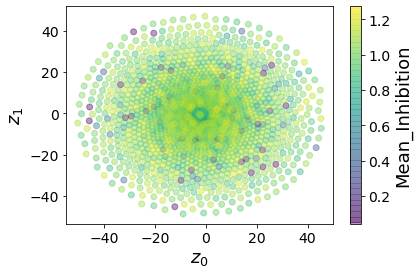

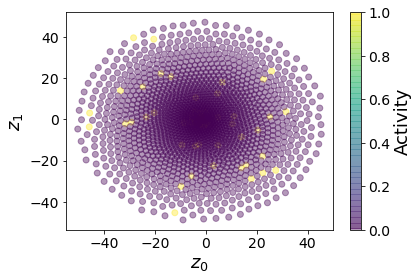

<Figure size 432x288 with 0 Axes>

In [14]:
for paint in ["Mean_Inhibition", "Activity"]:
    plot_tsne_v2(tsne_proj[outlier_mask], df[paint][outlier_mask], paint)

In [15]:
Counter(df["Activity"]) # 70 Active SMILES

Counter({1: 70, 0: 1544})

In [16]:
df.describe()

,Mean_Inhibition,Activity
count,1614.000000,1614.000000
mean,0.950822,0.043371
std,0.228796,0.203753
min,0.041572,0.000000
25%,0.926253,0.000000
50%,1.007755,0.000000
75%,1.068712,0.000000
max,1.273150,1.000000


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

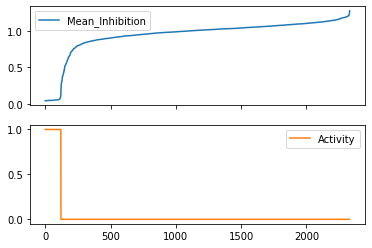

In [17]:
df.plot(subplots=True)

In [38]:
import smote_variants as sv
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split

def train_mlp(X, property_df, prop, **kwargs):
    
    y = np.array(property_df[prop])

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, random_state=1
    )
    
    oversampler = sv.distance_SMOTE()
    # X_samp and y_samp contain the oversampled dataset
    X_samp, y_samp = oversampler.sample(X_train, y_train)
    
    clf = MLPClassifier(random_state=1, max_iter=300, **kwargs).fit(X_samp, y_samp)
    
    print("Property:", prop)
    print("Train score:", clf.score(X_samp, y_samp))
    print("Test score:", clf.score(X_test, y_test))
    print()
    
    return X_train, X_test, y_train, y_test, clf

def train_mlp_regressor(X, property_df, prop, **kwargs):
    
    y = np.array(property_df[prop])

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=1
    )
        
    clf = MLPRegressor(random_state=1, max_iter=300, **kwargs).fit(X_train, y_train)
    
    print("Property:", prop)
    print("Train score:", clf.score(X_train, y_train))
    print("Test score:", clf.score(X_test, y_test))
    print()
    
    return X_train, X_test, y_train, y_test, clf

In [30]:
X_train, X_test, y_train, y_test, clf = train_mlp(embeddings, df, "Activity")

2022-05-23 10:21:12,545:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


Property: Activity
Train score: 0.5
Test score: 0.9554455445544554



# Analysis

This accuracy does not mean much since the data is heavily biased. 
There are only 70 Active labels vs 1544 Inactive: Counter({1: 70, 0: 1544})

<AxesSubplot:>

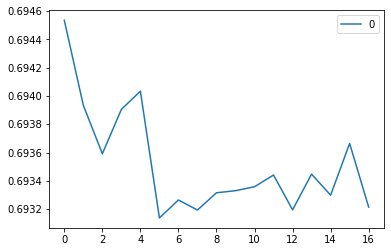

In [31]:
pd.DataFrame(clf.loss_curve_).plot()

In [32]:
df["MeanInhibition_Cutoff"] = df["Mean_Inhibition"] > 0.2

In [33]:
Counter(df["MeanInhibition_Cutoff"] )

Counter({False: 70, True: 1544})

In [34]:
X_train, X_test, y_train, y_test, clf = train_mlp(embeddings, df, "MeanInhibition_Cutoff")

2022-05-23 10:21:31,885:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


Property: MeanInhibition_Cutoff
Train score: 0.5
Test score: 0.9554455445544554



# Analysis
Same as above

<AxesSubplot:>

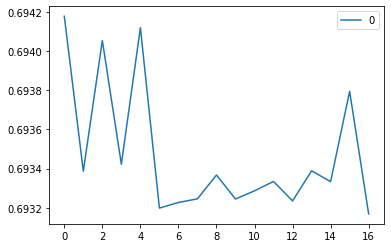

In [35]:
pd.DataFrame(clf.loss_curve_).plot()

In [59]:
# Trying regression
X_train, X_test, y_train, y_test, clf = train_mlp_regressor(
    embeddings, df, "Mean_Inhibition", hidden_layer_sizes=(16, 8), learning_rate_init=0.01, solver="sgd"
)

Property: Mean_Inhibition
Train score: -7.773446291770014e-06
Test score: -0.00296040425677635



<AxesSubplot:>

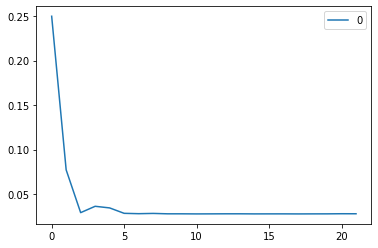

In [40]:
pd.DataFrame(clf.loss_curve_).plot()

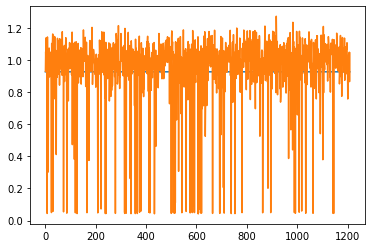

In [47]:
train_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

plt.plot(train_preds)
plt.plot(y_train)
plt.show()

In [60]:
df.corr()

,Mean_Inhibition,Activity,MeanInhibition_Cutoff
Mean_Inhibition,1.000000,-0.837949,0.837949
Activity,-0.837949,1.000000,-1.000000
MeanInhibition_Cutoff,0.837949,-1.000000,1.000000


In [71]:
embed_df = pd.DataFrame(embeddings)

In [72]:
embed_df["Mean_Inhibition"] = df["Mean_Inhibition"]
#embed_df["MeanInhibition_Cutoff"] = df["MeanInhibition_Cutoff"]

In [73]:
correlation = embed_df.corr()

<AxesSubplot:>

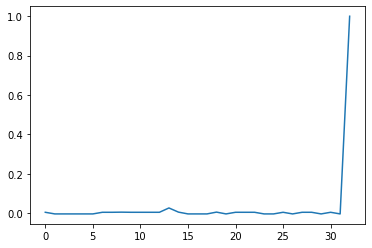

In [74]:
correlation["Mean_Inhibition"].plot()

In [75]:
correlation["Mean_Inhibition"]

0                  0.004147
1                 -0.004147
2                 -0.004147
3                 -0.004147
4                 -0.004147
5                 -0.004147
6                  0.004147
7                  0.004147
8                  0.004780
9                  0.004147
10                 0.004147
11                 0.004147
12                 0.004147
13                 0.026109
14                 0.004972
15                -0.004147
16                -0.004147
17                -0.004147
18                 0.004995
19                -0.004147
20                 0.004147
21                 0.004147
22                 0.004147
23                -0.004147
24                -0.004147
25                 0.004147
26                -0.004147
27                 0.004147
28                 0.004147
29                -0.004147
30                 0.004147
31                -0.004147
Mean_Inhibition    1.000000
Name: Mean_Inhibition, dtype: float64